Import modules

In [ ]:
import math 
import numpy as np
import pandas as pd
import random
import scipy
import matplotlib.pyplot as plt
from scipy.stats import binom 
from sklearn import  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Separate classes 
dataset_ALL=pd.read_excel('/content/drive/My Drive/FYP/Datasets/training_ALL.xlsx')
dataset_AML=pd.read_excel('/content/drive/My Drive/FYP/Datasets/training_AML.xlsx')

In [ ]:
from scipy.stats import norm 
# Calculate mean and standard deviation  
# Each gene for ALL and AML
mean_x = []
std_x = []
mean_y = []
std_y = []

for i in range (7128):
  x = dataset_ALL['Gene ' + str(i+1)]
  y = dataset_AML['Gene ' + str(i+1)]
 
  mean_x.append(np.mean(x))
  std_x.append(np.std(x))
  mean_y.append(np.mean(y))
  std_y.append(np.std(y))

Symbot search (functions)

In [ ]:
def percentage_mean_diff():
  count_goodgenes = 0
  percentage = []
  goodgenes = []
  for i in range(7128):
    sample_mean = abs(mean_x[i] - mean_y[i])
    # Calculate the percentage of difference between mean x and mean y
    if mean_x[i] == 0:
      percentage.append(sample_mean)
    else: 
      percentage.append(sample_mean/mean_x[i])

  # Find genes with more than 50% difference
  for i in range(7128):
    # Classify as good gene
    if percentage[i] > 0.5:
      goodgenes.append(i)
      count_goodgenes += 1
  print("Total good genes: ", count_goodgenes)
  return goodgenes

In [ ]:
import math
# Calculate range of distribution
def calculate_margin_error():
  sample_mean = []
  sample_sd = []
  margin_error = []
  for i in range(7128):
    sample_mean.append(abs(mean_x[i] - mean_y[i]))
    z_score = 1.96
    n = 38
    sample_sd.append(math.sqrt((pow(std_x[i], 2)/n) + (pow(std_y[i], 2)/n)))
    margin_error.append(z_score*sample_sd[i])

  return margin_error

In [ ]:
def calculategrade(gene_number):
  # Define grades
  gradeA = 0.45
  gradeB = 0.30
  gradeC = 0.15
  gradeD = 0.10
  gene_grade = 0
  all_gene_grades = []

  # Assign grade values to genes
  grade_res = calculate_margin_error()
  gene_grade_group = []
  for i in range(7128):
    if grade_res[i] > 75:
      gene_grade = gradeA
    elif grade_res[i] > 50:
        gene_grade = gradeB
    elif grade_res[i] > 25:
        gene_grade = gradeC
    else:
      gene_grade = gradeD
    gene_grade_group.append(gene_grade)

  return gene_grade_group[gene_number-1]

Data matrix

In [ ]:
# Initialise data matrix
preprocessed_dataset = pd.read_excel('/content/drive/My Drive/FYP/preprocessed_dataset.xlsx')
row = 20
column = 20
mat = [[0 for x in range(column)] for y in range(row)]

In [ ]:
# Find good genes
goodgenes = []
goodgenes = percentage_mean_diff()
print(goodgenes)
symbot_gene_group = []
for x in range(row):
    for y in range(column):
      gene_group = []
      selected_genes = []
      gene_number_group = []

      # Add 30 good genes into each cell
      for goodgene in range(30):
        index = random.randint(1,len(goodgenes)) - 1
        selected_genes.append(goodgenes[index])

      # Add 20 random genes into each cell
      for randomgene in range(20):
        selected_genes.append(random.randint(1,7128))

      # Append gene values to each cell
      symbot_gene_group.append(selected_genes)
      for i in range(len(selected_genes)):
        gene_group.append(preprocessed_dataset["Gene " + str(selected_genes[i])])     
      mat[x][y] = gene_group


Total good genes:  1713
[3, 9, 10, 19, 31, 36, 38, 39, 40, 47, 48, 49, 54, 55, 60, 63, 64, 71, 83, 86, 87, 91, 103, 113, 117, 118, 122, 126, 132, 133, 134, 138, 144, 146, 148, 156, 160, 163, 165, 166, 170, 171, 172, 174, 178, 191, 198, 199, 200, 205, 213, 223, 228, 229, 230, 234, 241, 243, 246, 247, 250, 252, 254, 257, 258, 265, 266, 269, 271, 274, 277, 280, 281, 282, 283, 287, 295, 301, 305, 311, 318, 319, 320, 336, 337, 342, 343, 351, 354, 359, 372, 376, 378, 382, 388, 394, 395, 396, 397, 403, 405, 406, 416, 417, 433, 434, 435, 437, 439, 441, 443, 458, 459, 460, 463, 467, 468, 470, 473, 476, 477, 478, 481, 484, 485, 486, 487, 489, 490, 503, 507, 509, 514, 518, 523, 526, 537, 540, 542, 552, 557, 558, 559, 560, 561, 564, 572, 581, 584, 586, 589, 592, 593, 596, 602, 603, 607, 614, 617, 618, 619, 624, 626, 628, 629, 631, 633, 634, 651, 652, 653, 657, 658, 660, 667, 669, 670, 671, 679, 680, 682, 684, 692, 694, 695, 696, 697, 698, 699, 704, 705, 706, 711, 714, 716, 718, 726, 728, 730, 734,

Symbot selection

In [ ]:
def initialise_symbot():
  x_position = random.randint(1,18)
  y_position = random.randint(1,18)

  print("X position: ", x_position)
  print("Y position: ", y_position)

  position_symbot = (x_position, y_position)
  initial_symbot = mat[x][y]

  return position_symbot

# Calculate field strength of solution
def field_strength(x, y):
  matrix_index = x*10 + y 
  neighbour_genes = symbot_gene_group[matrix_index]

  totalgrade = 0
  overall_grades = []
  res = calculate_margin_error()
  
  # Calculate total scores for each cell
  for i in range(50):
    j = neighbour_genes[i]
    overall_grades.append(calculategrade(j))
    totalgrade += calculategrade(j)
  return totalgrade

In [ ]:
def find_neighbours(x_position, y_position):
  neighbours = []

  # Position of surrounding neighbours
  up = (x_position, y_position-1)
  upRight = (x_position+1, y_position-1)
  right = (x_position+1, y_position)
  downRight = (x_position+1, y_position+1)
  down = (x_position, y_position+1)
  downLeft = (x_position-1, y_position+1)
  left = (x_position-1, y_position)
  upLeft = (x_position-1, y_position-1)

  # Add neighbours into the list
  neighbours.append(up)
  neighbours.append(upRight)
  neighbours.append(right)
  neighbours.append(downRight)
  neighbours.append(down)
  neighbours.append(downLeft)
  neighbours.append(left)
  neighbours.append(upLeft)
  return neighbours

In [ ]:
best_solutions = []

def move_symbot(x,y):
  counter = 0
  all_field_strengths = []
  new_solution = (x,y)
  neighbours = find_neighbours(x,y)

  # Current symbot position
  current_position = position_symbot
  print(current_position)

  # Current symbot field strength
  current_field_strength = field_strength(x,y)
  print("Initial score: ", current_field_strength)

  # Calculate field strengths of neighbours
  for i in range(len(neighbours)):
    x_neighbour, y_neighbour = neighbours[i]
    print(neighbours[i])
    next_field_strength = field_strength(x_neighbour, y_neighbour)
    all_field_strengths.append(next_field_strength)
    if next_field_strength > current_field_strength:
        counter += 1
    print("Score: ", next_field_strength)
    max_score = max(all_field_strengths)

  # Find best solution
  if max_score > current_field_strength:
    for i in range(len(neighbours)):
      # Move symbot to better solution
      if all_field_strengths[i] == max_score:
        new_solution = neighbours[i]
        best_solutions.append(neighbours[i])
        print("Moving symbot to: ", new_solution)
  print("Best score: ", max_score)


  if x != new_solution[0] or y != new_solution[1]:
    x = new_solution[0]
    y = new_solution[1] 
    move_symbot(x, y)

Initialise symbot

In [ ]:
# Initialise symbots in data matrix
# Each data matrix has 5 symbots
for symbots in range(5):
  print("Symbot ", symbots+1)
  position_symbot = initialise_symbot()
  x_position = position_symbot[0]
  y_position = position_symbot[1]

  find_neighbours(x_position, y_position)
  move_symbot(x_position, y_position)

print(best_solutions)

Symbot  1
X position:  6
Y position:  14
(6, 14)
Initial score:  15.249999999999995
(6, 13)
Score:  17.199999999999992
(7, 13)
Score:  16.449999999999992
(7, 14)
Score:  15.599999999999998
(7, 15)
Score:  15.649999999999997
(6, 15)
Score:  14.349999999999998
(5, 15)
Score:  16.949999999999992
(5, 14)
Score:  15.200000000000001
(5, 13)
Score:  14.8
Moving symbot to:  (6, 13)
Best score:  17.199999999999992
(6, 14)
Initial score:  17.199999999999992
(6, 12)
Score:  17.799999999999994
(7, 12)
Score:  15.749999999999996
(7, 13)
Score:  16.449999999999992
(7, 14)
Score:  15.599999999999998
(6, 14)
Score:  15.249999999999995
(5, 14)
Score:  15.200000000000001
(5, 13)
Score:  14.8
(5, 12)
Score:  16.149999999999995
Moving symbot to:  (6, 12)
Best score:  17.799999999999994
(6, 14)
Initial score:  17.799999999999994
(6, 11)
Score:  15.849999999999998
(7, 11)
Score:  14.449999999999994
(7, 12)
Score:  15.749999999999996
(7, 13)
Score:  16.449999999999992
(6, 13)
Score:  17.199999999999992
(5, 1

In [ ]:
symbot_solutions = []
for l in range(len(best_solutions)):
  group = best_solutions[l]
  x = group[0]
  y = group[1]
  val = x*10 + y 
  neighbour_genes = symbot_gene_group[val]
  symbot_solutions.append(neighbour_genes)

print(symbot_solutions)

[[4141, 2658, 2627, 4317, 6344, 3158, 1248, 3476, 3894, 2516, 1644, 6634, 2915, 6634, 965, 4317, 4995, 584, 4507, 2917, 6335, 4068, 1778, 5752, 2531, 1156, 1644, 1963, 3847, 1242, 4486, 60, 6342, 5791, 5238, 2346, 2163, 663, 7025, 5022, 4900, 6486, 6064, 442, 3925, 2802, 331, 216, 3569, 4496], [1530, 589, 5053, 1709, 6619, 6345, 1698, 3448, 2529, 1199, 6361, 3597, 816, 3667, 3895, 2140, 2378, 2029, 4781, 3500, 4446, 1778, 6859, 4589, 1535, 3610, 4090, 4757, 4489, 752, 3310, 5210, 1243, 6439, 5044, 7110, 3004, 6583, 5312, 6212, 4621, 170, 6465, 1178, 705, 5280, 4697, 5854, 799, 5336], [403, 3238, 4499, 5063, 1940, 2574, 4313, 283, 2981, 4739, 2077, 6298, 5372, 1111, 2388, 1647, 3450, 4781, 4062, 699, 2525, 271, 4586, 2253, 2949, 603, 133, 4935, 2780, 4269, 188, 1243, 4566, 1300, 4698, 4771, 3649, 531, 1543, 6012, 2237, 5761, 2345, 4492, 2220, 628, 6931, 5302, 263, 2860], [695, 2527, 1744, 4188, 4818, 4329, 6344, 343, 6000, 4140, 4816, 5106, 2641, 5112, 6558, 6560, 3201, 4176, 250, 4444,

Random selection

In [ ]:
# Random selection of genes
def random_sel():
  random_selection = []
  best_sol_len = len(best_solutions)
  for k in range(best_sol_len):
    random_gene_group = []
    random_selected_genes = []
    random_selected_genes = random.sample(range(1, 7128), 50)
    random_selection.append(random_selected_genes)
  return random_selection

Genetic Algorithm

In [ ]:
def crossover_chromosomes(population):
  print("--Crossover--")
  crossover_point = random.randint(1, len(selected_genes))
  print("Crossover point: ", crossover_point)

  initial_population = population
  print(initial_population)
  for i in range(int(len(initial_population)/2)):
      print("\nSelection Round ", i+1)
      print((initial_population[i]))
      position = random.sample(range(0,len(initial_population)), 2)
      print(position)
      position1 = position[0]
      position2 = position[1]

      # Assign two random solutions from population as parents
      parent1 = initial_population[position1]
      parent2 = initial_population[position2]

      print("--Before crossover...")
      print(parent1)
      print(parent2)

      # Perform crossover
      sec1 = parent1[0:crossover_point]
      sec2 = parent2[0:crossover_point]
      parent1[0:crossover_point] = sec2
      parent2[0:crossover_point] = sec1

      print("--After crossover...")
      print(parent1)
      print(parent2)

def mutate_chromosomes(initial_population):
  print("Mutation")

  # Select genes to mutate
  mutate_genes = random.sample(range(0,len(selected_genes)), 5)
  print(mutate_genes)

  for i in range(int(len(initial_population))):
    list_genes = initial_population[i]
    print("--Before mutation...")
    print(list_genes)

    # Mutate genes
    for j in range(len(mutate_genes)):
      list_genes[mutate_genes[j]] = random.randint(1,7128)
    print("--After mutation...")
    print(list_genes)

In [ ]:
 def build_ga(solutions):
  # Initialises population of group of genes
  print(solutions)
  initial_population = solutions

  # Crossover operation
  crossover_prob = 0.6
  check_crossover=random.random()
  if check_crossover <= crossover_prob:
    print("Applying crossover...")                
    crossover_chromosomes(initial_population)

  # Mutation operation
  mutation_rate = 0.1
  check_mutation=random.random()
  if check_mutation <= mutation_rate:
    print("Applying mutation...")                
    mutate_chromosomes(initial_population)

  print(best_solutions)
  return initial_population


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image, display

overall_max_score_gen = []
def apply_svm(genes):
  all_classifier_scores = []
  path = '/content/drive/My Drive/FYP/Datasets/complete_dataset.xlsx'  # training and testing dataset combined
  final_genes = genes
  for i in range(len(final_genes)):
    print("Solution ", i+1)
    Xtest = pd.read_excel(path,usecols=final_genes[i])
    Ytest = pd.read_excel(path,usecols=[0])

    x_train, x_test, y_train, y_test = train_test_split(Xtest, Ytest, test_size=0.5, random_state=0)
    x_train.shape, y_train.shape, x_test.shape, y_test.shape

    # apply_svm.xtrain = x_train
    # apply_svm.ytrain = y_train

    # Feature standardisation
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Use testing dataset
    svc = SVC()
    svc.fit(x_train, y_train.values.ravel())

    classifier_score = svc.score(x_test, y_test)
    all_classifier_scores.append(classifier_score)
    print('\nThe classifier accuracy score is', classifier_score)

    # Confusion matrix
    y_pred = svc.predict(x_test)
    print(y_pred)
    cm = confusion_matrix(y_test, y_pred)

    if i == 9:
      fig, ax = plt.subplots(figsize=(5, 5))
      ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
      for i in range(cm.shape[0]):
          for j in range(cm.shape[1]):
              ax.text(x=j, y=i,
                      s=cm[i, j], 
                      va='center', ha='center')
      plt.xlabel('Predicted Values', )
      plt.ylabel('Actual Values')
      plt.show()
    print(classification_report(y_test, y_pred ))

  max_score_gen = max(all_classifier_scores)
  avg_score_gen = sum(all_classifier_scores)/len(all_classifier_scores)
  print("Best classifier accuracy for iteration: ", i, max_score_gen)
  print("Average classifier accuracy for iteration: ", avg_score_gen)
  
  next_population = []
  for gen in range(len(all_classifier_scores)):
    if all_classifier_scores[gen] == max_score_gen:
      print("Best solution: ", gen + 1)
      next_population = genes[gen]
  print("Next population" , next_population)

  return avg_score_gen, max_score_gen, next_population, x_train, y_train

Assemble the code

In [ ]:
# Random selection
all_avg_score_rdm = []
all_max_score_rdm = []
keep_best_solution = []
for iter in range(10):
  print("Iteration ", iter+1)

  # Best solutions from random selection
  genes1 = []
  genes1.append(keep_best_solution)

  # Apply GA
  genes1 = build_ga(random_sel())
  keep_best_solution = []
  print(genes1)

  # Apply SVM
  avg_res1, max_res1, keep_best_solution, _, _ = apply_svm(genes1)
  all_avg_score_rdm.append(avg_res1)
  all_max_score_rdm.append(max_res1)

Iteration  1
[[4401, 5078, 5999, 1759, 4416, 5695, 6525, 7007, 2419, 3219, 1024, 490, 5026, 5245, 1231, 3520, 1432, 3575, 2973, 428, 7077, 1560, 2710, 404, 1139, 3566, 1567, 6490, 1376, 796, 1236, 4828, 5690, 5518, 2320, 678, 4061, 4771, 4025, 3569, 6517, 1165, 6655, 5642, 2831, 5224, 4268, 6108, 4324, 2144], [3734, 5950, 6655, 7056, 2959, 1523, 1330, 2136, 1028, 3299, 683, 3891, 3189, 1737, 3291, 2986, 750, 5429, 281, 3366, 3725, 2713, 4764, 3584, 2964, 2073, 468, 6490, 4483, 3901, 7012, 6095, 2055, 1622, 2472, 5498, 4222, 5040, 6040, 3195, 4232, 5304, 978, 1535, 1620, 4659, 3838, 258, 3793, 2314], [3044, 4909, 3075, 4351, 176, 1100, 701, 1490, 5842, 2446, 3178, 4427, 5923, 864, 146, 5260, 221, 2434, 1131, 6419, 2772, 4678, 3173, 6541, 5746, 4566, 131, 879, 2946, 4815, 608, 621, 5622, 4742, 5793, 2780, 2818, 5265, 6615, 6842, 466, 2829, 3292, 1177, 6231, 3669, 3175, 1015, 6860, 6641], [2899, 6753, 5336, 6968, 609, 1232, 1562, 256, 790, 4116, 5173, 6574, 415, 1804, 2541, 6640, 4434, 12

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.6666666666666666
['ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.66      1.00      0.79        23
         AML       1.00      0.08      0.14        13

    accuracy                           0.67        36
   macro avg       0.83      0.54      0.47        36
weighted avg       0.78      0.67      0.56        36

Solution  3

The classifier accuracy score is 0.6944444444444444
['ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.68      1.00      0.81        23
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.7777777777777778
['ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL'
 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML']
              precision    recall  f1-score   support

         ALL       0.74      1.00      0.85        23
         AML       1.00      0.38      0.56        13

    accuracy                           0.78        36
   macro avg       0.87      0.69      0.70        36
weighted avg       0.84      0.78      0.74        36

Solution  7

The classifier accuracy score is 0.6666666666666666
['ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.66      1.00      0.79        23
      

In [ ]:
# Symbot selection
all_avg_score_sym = []
all_max_score_sym = []
keep_best_solution2 = []

for iter in range(10):
  print("Iteration ", iter+1) 

  # Best solutions from symbot search
  genes2 = []
  genes2.append(keep_best_solution2)

  # Apply GA
  genes2 = build_ga(symbot_solutions)
  keep_best_solution2 = []
  print(genes2)

  # Apply SVM
  avg_res2, max_res2, keep_best_solution2, x_train, y_train = apply_svm(genes2)
  all_avg_score_sym.append(avg_res2)
  all_max_score_sym.append(max_res2)

Iteration  1
[[4141, 2658, 2627, 4317, 6344, 3158, 1248, 3476, 3894, 2516, 1644, 6634, 2915, 6634, 965, 4317, 4995, 584, 4507, 2917, 6335, 4068, 1778, 5752, 2531, 1156, 1644, 1963, 3847, 1242, 4486, 60, 6342, 5791, 5238, 2346, 2163, 663, 7025, 5022, 4900, 6486, 6064, 442, 3925, 2802, 331, 216, 3569, 4496], [1530, 589, 5053, 1709, 6619, 6345, 1698, 3448, 2529, 1199, 6361, 3597, 816, 3667, 3895, 2140, 2378, 2029, 4781, 3500, 4446, 1778, 6859, 4589, 1535, 3610, 4090, 4757, 4489, 752, 3310, 5210, 1243, 6439, 5044, 7110, 3004, 6583, 5312, 6212, 4621, 170, 6465, 1178, 705, 5280, 4697, 5854, 799, 5336], [403, 3238, 4499, 5063, 1940, 2574, 4313, 283, 2981, 4739, 2077, 6298, 5372, 1111, 2388, 1647, 3450, 4781, 4062, 699, 2525, 271, 4586, 2253, 2949, 603, 133, 4935, 2780, 4269, 188, 1243, 4566, 1300, 4698, 4771, 3649, 531, 1543, 6012, 2237, 5761, 2345, 4492, 2220, 628, 6931, 5302, 263, 2860], [695, 2527, 1744, 4188, 4818, 4329, 6344, 343, 6000, 4140, 4816, 5106, 2641, 5112, 6558, 6560, 3201, 417

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.8888888888888888
['ALL' 'AML' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'AML' 'AML' 'AML' 'ALL' 'ALL'
 'AML' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML']
              precision    recall  f1-score   support

         ALL       0.85      1.00      0.92        23
         AML       1.00      0.69      0.82        13

    accuracy                           0.89        36
   macro avg       0.93      0.85      0.87        36
weighted avg       0.91      0.89      0.88        36

Solution  3

The classifier accuracy score is 0.6666666666666666
['ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.66      1.00      0.79        23
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.8888888888888888
['ALL' 'AML' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'AML' 'AML' 'AML' 'ALL' 'ALL'
 'AML' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML']
              precision    recall  f1-score   support

         ALL       0.85      1.00      0.92        23
         AML       1.00      0.69      0.82        13

    accuracy                           0.89        36
   macro avg       0.93      0.85      0.87        36
weighted avg       0.91      0.89      0.88        36

Solution  3

The classifier accuracy score is 0.6666666666666666
['ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.66      1.00      0.79        23
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.8333333333333334
['ALL' 'AML' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'AML' 'AML' 'AML' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML']
              precision    recall  f1-score   support

         ALL       0.79      1.00      0.88        23
         AML       1.00      0.54      0.70        13

    accuracy                           0.83        36
   macro avg       0.90      0.77      0.79        36
weighted avg       0.87      0.83      0.82        36

Solution  7

The classifier accuracy score is 0.8333333333333334
['ALL' 'AML' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'AML' 'AML' 'ALL' 'ALL'
 'AML' 'ALL' 'ALL' 'AML' 'AML' 'AML' 'AML' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML']
              precision    recall  f1-score   support

         ALL       0.84      0.91      0.87        23
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.8333333333333334
['ALL' 'AML' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'AML' 'AML' 'ALL' 'ALL' 'AML'
 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.79      1.00      0.88        23
         AML       1.00      0.54      0.70        13

    accuracy                           0.83        36
   macro avg       0.90      0.77      0.79        36
weighted avg       0.87      0.83      0.82        36

Solution  5

The classifier accuracy score is 0.6666666666666666
['ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.66      1.00      0.79        23
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.8333333333333334
['ALL' 'AML' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'AML' 'AML' 'ALL' 'ALL' 'AML'
 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.79      1.00      0.88        23
         AML       1.00      0.54      0.70        13

    accuracy                           0.83        36
   macro avg       0.90      0.77      0.79        36
weighted avg       0.87      0.83      0.82        36

Solution  5

The classifier accuracy score is 0.6666666666666666
['ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.66      1.00      0.79        23
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classifier accuracy score is 0.75
['ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'AML']
              precision    recall  f1-score   support

         ALL       0.72      1.00      0.84        23
         AML       1.00      0.31      0.47        13

    accuracy                           0.75        36
   macro avg       0.86      0.65      0.65        36
weighted avg       0.82      0.75      0.70        36

Solution  5

The classifier accuracy score is 0.6666666666666666
['ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL'
 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL' 'ALL']
              precision    recall  f1-score   support

         ALL       0.66      1.00      0.79        23
         AML       1

Plot accuracy graph

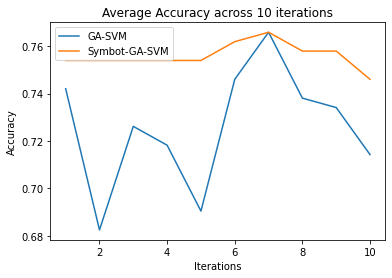

In [ ]:
# Average accuracy for random selection and maximum selection
list1 = all_avg_score_rdm
list2 = all_avg_score_sym

# Plot axis
x = [1,2,3,4,5,6,7,8,9,10]
y1 = list1
y2 = list2

# Plot average accuracy graph
plt.plot(x, y1, label = "GA-SVM")
plt.plot(x, y2, label = "Symbot-GA-SVM")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Average Accuracy across 10 iterations')
plt.legend()
plt.show()

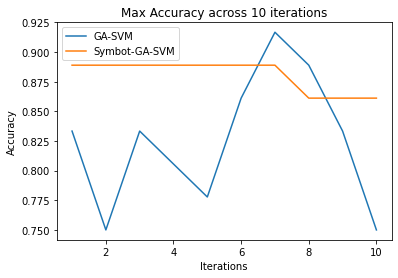

In [ ]:
# Maximum accuracy from random selection and symbot selection
list3 = all_max_score_rdm
list4 = all_max_score_sym

# Plot axis
x = [1,2,3,4,5,6,7,8,9,10]
y3 = list3
y4 = list4

# Plot maximum accuracy graph
plt.plot(x, y3, label = "GA-SVM")
plt.plot(x, y4, label = "Symbot-GA-SVM")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Max Accuracy across 10 iterations')
plt.legend()
plt.show()

List the best subset of gene names

In [ ]:
from pandas import DataFrame
# Path to gene name dataset
gene_name_path = '/content/drive/My Drive/FYP/Datasets/gene_names.xlsx'
print(keep_best_solution2)

# Create two dataframes to 
df1 = DataFrame(keep_best_solution2, columns=["Gene Number"])
df2 = pd.read_excel(gene_name_path)

# Match gene number to dataframe
dfCombined = pd.merge(df1,df2, how="inner", on="Gene Number")
print(dfCombined)

[1391, 5653, 5053, 2344, 4818, 4329, 6344, 343, 6000, 4140, 2663, 5106, 2641, 5112, 6558, 6560, 3201, 4176, 250, 4444, 5986, 4704, 50, 5137, 1535, 3610, 4090, 4757, 4489, 752, 3310, 5210, 1243, 6439, 168, 7110, 3004, 6583, 5312, 6212, 4621, 170, 6465, 1178, 705, 5280, 4697, 5854, 799, 5336]
    Gene Number                 Gene Name
0          1391                 L20852_at
1          5653               Z75190_s_at
2          5053                 Z11737_at
3          2344            M91029_cds2_at
4          4818                 X93510_at
5          4329                 X59434_at
6          6344               M73746_s_at
7           343                 D29643_at
8          6000          J05016_rna1_s_at
9          4140                 X13967_at
10         2663                 U07225_at
11         5106                 Z29064_at
12         2641                 U05237_at
13         5112                 Z29331_at
14         6558               U76366_s_at
15         6560               X76942